### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
import seaborn as sns


df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\r\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\r\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\r\nJoshualand, VA ..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\r\nFPO AE 73316


# Regresión en función de AVG. AREA INCOME

In [2]:
X_income = df['Avg. Area Income']
y = df['Price']

In [3]:
# Se parte el conjunto en "train" y "test".
X_income_train, X_income_test, y_income_train, y_income_test = train_test_split(X_income, y, test_size=0.2, random_state=101)

In [4]:
X_income_train = np.array(X_income_train)
X_income_test = np.array(X_income_test)

In [5]:
print(X_income_train.shape)
print(X_income_test.shape)

(4000,)
(1000,)


In [6]:
X_income_train = X_income_train.reshape(-1, 1)
X_income_test = X_income_test.reshape(-1, 1)

In [7]:
print(X_income_train.shape)
print(X_income_test.shape)

(4000, 1)
(1000, 1)


In [8]:
# Se crea la variable que representa el modelo
reglin_income = LinearRegression()

In [9]:
# Se entrena el modelo con el conjunto "train"
reglin_income.fit(X_income_train, y_income_train)

LinearRegression()

In [10]:
print("Secante (income):", reglin_income.intercept_)
print("Pendiente (income):", reglin_income.coef_)

Secante (income): -215047.77188411704
Pendiente (income): [21.08845731]


In [11]:
print("Score TRAIN (income):", reglin_income.score(X_income_train, y_income_train) *100)
print("Score TEST (income):", reglin_income.score(X_income_test, y_income_test) *100)

Score TRAIN (income): 40.63479319730665
Score TEST (income): 41.93148429872476


In [12]:
income_predictions = reglin_income.predict(X_income_test)

In [13]:
X_income = np.array(X_income).reshape(-1, 1)
X_income

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

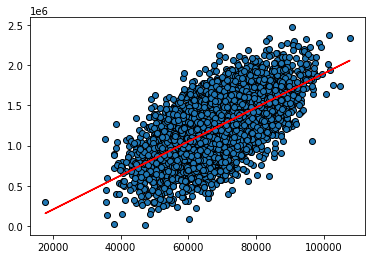

In [14]:
# Se grafica la dispersión de puntos para TODOS los valores del dataset y su recta de ajuste.

plt.scatter(X_income, y, edgecolor='black')
plt.plot(X_income, reglin_income.predict(X_income), c = 'r')

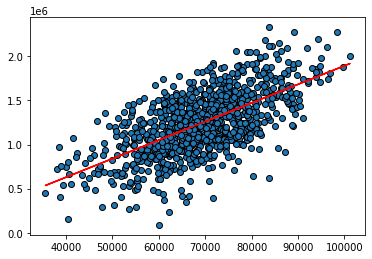

In [15]:
# Se grafica la dispersion de los puntos del grupo de TEST y la recta de predicciones.

plt.scatter(X_income_test, y_income_test, edgecolor='black')
plt.plot(X_income_test, reglin_income.predict(X_income_test), c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

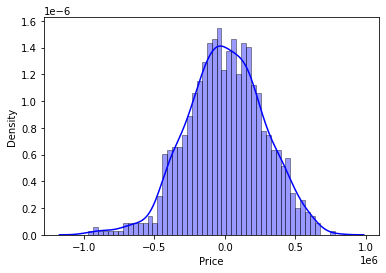

In [16]:
sns.distplot((y_income_test - income_predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [17]:
print('MAE (income):', metrics.mean_absolute_error(y_income_test, income_predictions))
print('MSE (income):', metrics.mean_squared_error(y_income_test, income_predictions))
print('RMSE (income):', np.sqrt(metrics.mean_squared_error(y_income_test, income_predictions)))

MAE (income): 217619.5644321996
MSE (income): 74402787880.48894
RMSE (income): 272768.7443247282


# Regresión en función de AVG. AREA HOUSE AGE

In [18]:
X_age = df['Avg. Area House Age']
y = df['Price']

In [19]:
# Se parte el conjunto en "train" y "test".
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(X_age, y, test_size=0.2)

In [20]:
X_age_train = np.array(X_age_train)
X_age_test = np.array(X_age_test)

In [21]:
print(X_age_train.shape)
print(X_age_test.shape)

(4000,)
(1000,)


In [22]:
X_age_train = X_age_train.reshape(-1, 1)
X_age_test = X_age_test.reshape(-1, 1)

In [23]:
print(X_age_train.shape)
print(X_age_test.shape)

(4000, 1)
(1000, 1)


In [24]:
# Se crea la variable que representa el modelo
reglin_age = LinearRegression()

In [25]:
# Se entrena el modelo con el conjunto "train"
reglin_age.fit(X_age_train, y_age_train)

LinearRegression()

In [26]:
print("Secante (age):", reglin_age.intercept_)
print("Pendiente (age):", reglin_age.coef_)

Secante (age): 273853.1366189172
Pendiente (age): [160340.24190817]


In [27]:
print("Score TRAIN (age):", reglin_age.score(X_age_train, y_age_train) *100)
print("Score TEST (age):", reglin_age.score(X_age_test, y_age_test) *100)

Score TRAIN (age): 19.92169343419047
Score TEST (age): 22.660337925763972


In [28]:
age_predictions = reglin_age.predict(X_age_test)

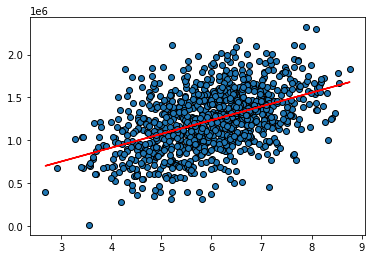

In [29]:
# Se grafica la dispersion de puntos del grupo TEST y la rescta de ajuste.

plt.scatter(X_age_test, y_age_test, edgecolor='black')
plt.plot(X_age_test, age_predictions, c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

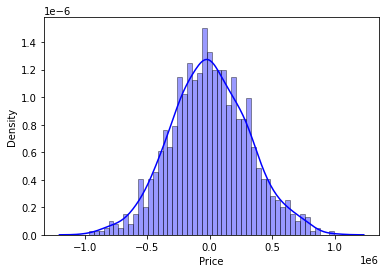

In [30]:
sns.distplot((y_age_test - age_predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

In [31]:
print('MAE (age):', metrics.mean_absolute_error(y_age_test, age_predictions))
print('MSE (age):', metrics.mean_squared_error(y_age_test, age_predictions))
print('RMSE (age):', np.sqrt(metrics.mean_squared_error(y_age_test, age_predictions)))

MAE (age): 248592.68675276608
MSE (age): 97924071634.23915
RMSE (age): 312928.2212173251


# Regresión en función de AVG. AREA NUMBER OF ROOMS

In [32]:
X_rooms = df['Avg. Area Number of Rooms']
y = df['Price']

In [33]:
# Se parte el conjunto en "train" y "test".
def regresion_lineal(X, y):
    global predictions
    global y_test
    global X_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    print("Shape X_train:", X_train.shape)
    print("Shape X_test:", X_test.shape)
    print('')
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    print("Shape X_train:", X_train.shape)
    print("Shape X_test:", X_test.shape)
    print('')
    # Se crea la variable que representa el modelo
    reglin = LinearRegression()
    # Se entrena el modelo con el conjunto "train"
    reglin.fit(X_train, y_train)
    print("Secante:", reglin.intercept_)
    print("Pendiente:", reglin.coef_)
    print('')
    print("Score TRAIN:", reglin.score(X_train, y_train) *100)
    print("Score TEST:", reglin.score(X_test, y_test) *100)
    predictions = reglin.predict(X_test)
    print('')
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('=============================================================================================================================')
    return y_test, predictions, X_test

In [34]:
regresion_lineal(X_rooms, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 397939.2183562176
Pendiente: [119269.27214559]

Score TRAIN: 11.570529976026233
Score TEST: 9.964188113077677

MAE: 265978.7790087863
MSE: 110040302787.70518
RMSE: 331723.23220978235


(1381    1.500940e+06
 4679    7.356605e+05
 3659    9.512439e+05
 4017    1.236633e+06
 4010    1.527676e+06
             ...     
 1028    9.615391e+05
 3246    1.455511e+06
 2898    1.561314e+06
 2723    1.259357e+06
 4090    1.373107e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1292038.54974825, 1229832.4317124 , 1231229.48899693,
        1141024.04141542, 1101666.22588922, 1381860.65814442,
        1470687.6675542 , 1388030.4362155 , 1359455.87402097,
        1180873.17143863, 1295016.99120366, 1224156.9965268 ,
        1331427.40737734, 1135482.16927085, 1262437.2230383 ,
        1111069.90234285, 1035675.24408071, 1331549.08249816,
        1166360.35822563, 1255672.85114798, 1350086.33258548,
        1189164.95912219, 1155655.12811133, 1021771.33479651,
        1187082.10894492, 1152680.85008783, 1293750.80022291,
        1297576.59823796, 1221589.67497532, 1376347.21084644,
        1185851.55509665, 1365106.28414793, 1297299.47955466,
        1266211.7365706 , 123009

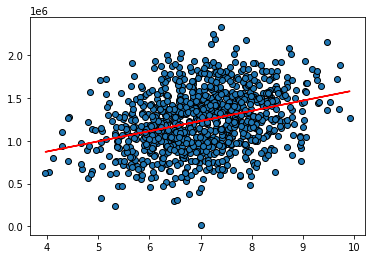

In [35]:
# Se grafica la dispersion de los puntos del conjunto TEST y la recta de ajuste de la predicción.

plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

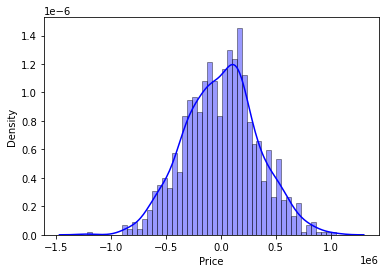

In [36]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Regresión en función de AVG. AREA NUMBER OF BEDROOMS

In [37]:
X_bedrooms = df['Avg. Area Number of Bedrooms']
y = df['Price']

In [38]:
regresion_lineal(X_bedrooms, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 1039679.2061882123
Pendiente: [48183.82873976]

Score TRAIN: 2.8318091526248645
Score TEST: 3.300466428873705

MAE: 276557.299408545
MSE: 119179112561.3626
RMSE: 345223.2792865548


(4473    8.562616e+05
 2059    9.753856e+05
 2061    9.792828e+05
 2955    1.617405e+06
 3678    1.560870e+06
             ...     
 823     1.209288e+06
 4773    6.799223e+05
 4041    1.076602e+06
 1712    1.599852e+06
 3670    1.815920e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1237232.90402125, 1195312.97301765, 1190976.42843107,
        1300353.71967034, 1194831.13473025, 1281562.02646183,
        1185194.3689823 , 1345646.51868572, 1237232.90402125,
        1254097.24408016, 1289271.43906019, 1281080.18817443,
        1141347.08482912, 1332155.04663858, 1189049.07528148,
        1285898.57104841, 1233860.03600946, 1248315.18463139,
        1289271.43906019, 1202540.54732862, 1293126.14535937,
        1348055.7101227 , 1184230.69240751, 1247351.5080566 ,
        1146647.30599049, 1294089.82193417, 1298908.20480815,
        1338418.94437475, 1283971.21789882, 1140865.24654172,
        1143274.43797871, 1232414.52114727, 1206395.2536278 ,
        1191458.26671847, 129505

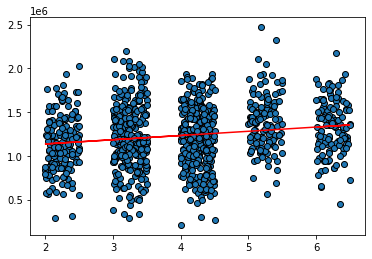

In [39]:
# Se grafica la dispersion de los puntos del conjunto TEST y la recta de ajuste de la prediccion.

plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, c = 'r')



C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

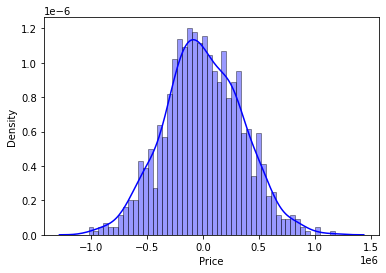

In [40]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

# Regresión en función de AVG. AREA POPULATION

In [41]:
X_population = df['Area Population']
y = df['Price']

In [42]:
regresion_lineal(X_population, y)

Shape X_train: (4000,)
Shape X_test: (1000,)

Shape X_train: (4000, 1)
Shape X_test: (1000, 1)

Secante: 703251.0587222142
Pendiente: [14.52509019]

Score TRAIN: 16.747158909745576
Score TEST: 16.01098696211558

MAE: 256809.37784904256
MSE: 104326300247.15068
RMSE: 322995.8207889859


(1246    1.741053e+06
 1863    1.118166e+06
 1017    6.732251e+05
 3163    1.752113e+06
 1009    1.311681e+06
             ...     
 1543    6.713439e+05
 4518    9.815598e+05
 475     1.053815e+06
 3230    1.549031e+06
 4634    1.792753e+06
 Name: Price, Length: 1000, dtype: float64,
 array([1488341.54752613, 1195525.32310815, 1185499.70917963,
        1392500.83609925, 1137873.27943754, 1148302.38098412,
        1400707.67109417, 1203000.55123187, 1323375.38509357,
        1453650.88317945, 1447211.6383426 , 1410411.18462448,
        1233908.34736413, 1406553.52159736, 1310681.09011672,
        1359221.382715  , 1382769.42267491, 1297205.46362793,
        1250894.84709911, 1295826.44897327, 1254752.58262571,
        1017164.3188026 , 1249888.90296139, 1485167.76968196,
        1302627.55034614, 1071862.43196566, 1175445.9044995 ,
        1229670.91329464, 1241909.17493903,  977843.06159295,
        1103135.01269585, 1224171.17399158, 1096721.94097321,
        1256256.03498126, 134403

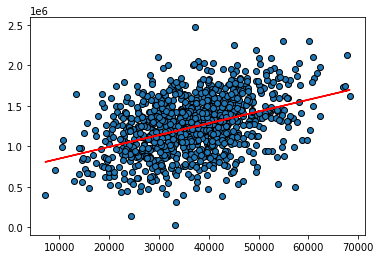

In [43]:
# Se grafica la dispersion de los puntos del conjunto TEST y la recta de ajuste de la prediccion.

plt.scatter(X_test, y_test, edgecolor='black')
plt.plot(X_test, predictions, c = 'r')

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

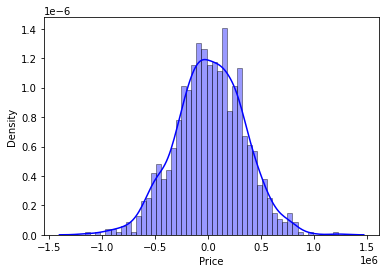

In [44]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')